# 3.2 학습 데이터를 바꾼다


* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## 0. 기본 분류모델(DecisionTree)

In [1]:
# 라이브러리 로딩
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# 데이터분할
y = df['species']
X = df.drop(['species'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# 학습 - DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 정확도: {0:.2f}'.format(score))

의사결정나무 정확도: 0.89


## 3.2.1 교차검증

In [2]:
# KFold
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    print('-------------------------------------------')
    print("학습용:", train_index)
    print("\n학습용 레이블", y[train_index].unique())
    print("\n\n테스트용:", test_index)
    print("\n테스트용 레이블", y[test_index].unique())

-------------------------------------------
학습용: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

학습용 레이블 [1 2]


테스트용: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

테스트용 레이블 [0]
-------------------------------------------
학습용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124

In [3]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(X, y):
    print('-------------------------------------------')
    print("학습용:", train_index)
    print("\n학습용 레이블", y[train_index].unique())
    print("\n\n테스트용:", test_index)
    print("\n테스트용 레이블", y[test_index].unique())

-------------------------------------------
학습용: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

학습용 레이블 [0 1 2]


테스트용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

테스트용 레이블 [0 1 2]
-------------------------------------------
학습용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  83  84  85  86
  87  88  89  90  91  92  93 

In [4]:
from sklearn.model_selection import cross_validate

scores = cross_validate(tree_model, X_train, y_train, cv=3, return_estimator=True)
scores

{'estimator': [DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42)],
 'fit_time': array([0.00594378, 0.00267434, 0.00250626]),
 'score_time': array([0.00193548, 0.00182271, 0.00181842]),
 'test_score': array([0.92105263, 0.91891892, 0.94594595])}

In [5]:
# 3개의 분류기 평가
for i in range(3):     
    score = scores['estimator'][i].score(X_test, y_test)
    print('{0}번째 의사결정나무 정확도: {1:.2f}'.format(i+1, score))

1번째 의사결정나무 정확도: 0.89
2번째 의사결정나무 정확도: 0.89
3번째 의사결정나무 정확도: 0.95


## 3.2.2 스케일조절

In [6]:
# 라이브러리 로딩
import pandas as pd
from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
minmax_scaled_data = minmax_scaler.transform(X)
minmax_scaled_df = pd.DataFrame(data=minmax_scaled_data, columns=iris.feature_names)
minmax_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X)
standard_scaled_data = standard_scaler.transform(X)
standard_scaled_df = pd.DataFrame(data=standard_scaled_data, columns=iris.feature_names)
standard_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## 3.2.3 차원축소

In [9]:
# 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# PCA
pca = PCA(n_components= 4)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


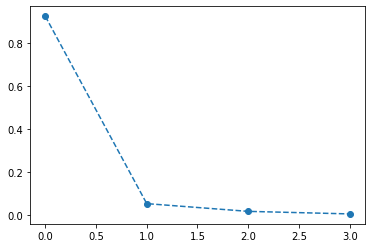

In [10]:
# scree plot
plt.plot(pca.explained_variance_ratio_, 'o--')

In [11]:
# PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_1'] = pca_transformed[:,0]
df['pca_2'] = pca_transformed[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


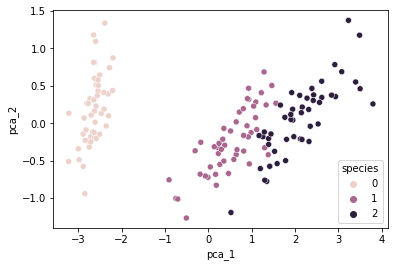

In [12]:
import seaborn as sns

sns.scatterplot(x= df['pca_1'], y= df['pca_2'], hue=df['species'], legend ='auto')

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 데이터분할
y = df['species']
X = df.iloc[:, 5:]  #pca_1, pca_2 컬럼만 사용

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# 학습 - DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 정확도: {0:.2f}'.format(score))

의사결정나무 정확도: 0.89
